<a href="https://colab.research.google.com/github/mayaraperroni9/datascience/blob/main/Naive_Bayes_Curriculum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução

1) Importação de Bibliotecas: Importa todas as bibliotecas necessárias para manipulação de dados, tokenização, criação de modelos e avaliação, e baixa os recursos necessários do NLTK.

2) Pré-processamento dos Dados: Limpa o texto, removendo pontuações e stopwords, converte para minúsculas e divide os dados em conjuntos de treino e teste. Além disso, verifica se a coluna classe existe antes de tentar acessá-la.

3) Abordagem - Naive Bayes com Bag of Words:
- Vetoriza o texto usando Bag of Words.
- Treina um modelo Naive Bayes com os dados vetorizados.
- Avalia o modelo usando um relatório de classificação.


O banco de dados ultilizado pode ser encontrado em https://www.kaggle.com/datasets/samdeeplearning/deepnlp/data

Sheet_2.csv contém 125 currículos, na coluna resume_text. Os currículos foram consultados a partir de Indeed.com com a palavra-chave 'cientista de dados', localização 'Vermont'. Se um currículo não estiver sinalizado, o candidato poderá enviar uma versão modificada do currículo posteriormente. Se for "sinalizado", o candidato é convidado a entrevistar.

Com base na descrição do conjunto de dados fornecida, parece que estamos lidando com um problema de classificação de currículos de Data Scientists em Vermont. As classes no conjunto de dados parecem representar se um currículo foi marcado ou não para convite de entrevista:

- Classe 0 (ou "not_flagged"): Indica que o currículo não foi marcado para convite de entrevista. O candidato pode enviar uma versão modificada do currículo posteriormente.
- Classe 1 (ou "flagged"): Indica que o currículo foi marcado para convite de entrevista. O candidato foi convidado para uma entrevista.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import nltk
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Baixar recursos NLTK
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Trabalho Redes Neurais/Dados/Sheet_2.csv', encoding = 'latin1')

df.head(10)

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
5,resume_6,not_flagged,\rPoultney VT - Email me on Indeed: indeed.com...
6,resume_7,not_flagged,\rMedical Laboratory Scientist (Special Chemis...
7,resume_8,flagged,Statistician\rBurlington VT - Email me on Inde...
8,resume_9,not_flagged,Research technician\rBurlington VT - Email me ...
9,resume_10,not_flagged,Barbara Hennessey-Elzohairy\rNewport VT - Emai...


#Pré-processamento dos Dados

In [ ]:
# Função para limpar o texto
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('portuguese'))
def preprocess_text(text):
    # Converter para minúsculas
    text = text.lower()
    # Remover pontuação
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remover stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Aplicar a função de limpeza nos dados
df['resume_text'] = df['resume_text'].apply(preprocess_text)

# Converter as classes para valores binários
df['class'] = df['class'].map({'not_flagged': 0, 'flagged': 1})


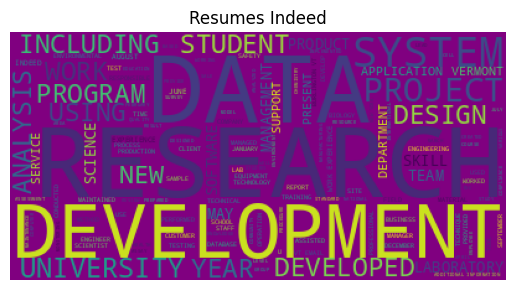

In [ ]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from wordcloud import WordCloud, STOPWORDS

def cloud(text):
    wordcloud = WordCloud(background_color="purple",stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Resumes Indeed")
cloud(df['resume_text'])

In [ ]:
# Separação dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(df['resume_text'], df['class'], test_size=0.2, random_state=42)

In [ ]:
len(x_test)

25

In [ ]:
# Imprimir X_train
print("X_train:")
print(x_train)

# Imprimir y_train
print("\ny_train:")
print(y_train)

# Imprimir x_teste
print("\nx_teste:")
print(x_test)

# Imprimir y_teste
print("\ny_teste:")
print(y_test)


X_train:
67     maria ramosnino medical laboratory scientistch...
12     benjamin symonds essex junction vt email on in...
24     david lucero public health analyst burlington ...
45     heath evola project consultant waitsfield vt e...
108    theresa petzoldt phlebotomist north country ho...
                             ...                        
106    swaminathan prasanna senior ui developer ats t...
14     brad gallant senior engineermetrologist east c...
92     samantha gagnon data entry jp morgan chase s b...
51     job seeker staff scientist field geologist sto...
102    stephanie locke head cashierequipment technici...
Name: resume_text, Length: 100, dtype: object

y_train:
67     0
12     0
24     1
45     0
108    0
      ..
106    1
14     0
92     0
51     0
102    0
Name: class, Length: 100, dtype: int64

x_teste:
18     christopher fusting data science consultant bu...
42     guang zeng research scientistimaging specialis...
36     felicity milton mechanical engineer spo

In [ ]:
def descrever_df(df: pd.DataFrame):
    # Exibir informações básicas do DataFrame
    print(f"O conjunto de dados contém {df.shape[1]} atributos e {len(df)} linhas")

    # Loop através das colunas do DataFrame
    for col in df.columns:
        tipo_coluna = df[col].dtype
        print(f"\nColuna: {col} ({tipo_coluna})")

        # Se a coluna for do tipo 'object'
        if tipo_coluna == 'object':
            print(f"--- Porcentagem de NaNs (Missing Values): {df[col].isna().sum() / len(df[col]) * 100:.2f}%")
            print(f"--- Valores únicos:\n {df[col].unique()[:10]}")  # Limitar a exibição a 10 valores únicos
        else:
            # Estatísticas resumidas para colunas numéricas
            print(f"--- Estatísticas resumidas:\n {df[col].describe()}")

# Apresentar o DataFrame
descrever_df(df)


O conjunto de dados contém 3 atributos e 125 linhas

Coluna: resume_id (object)
--- Porcentagem de NaNs (Missing Values): 0.00%
--- Valores únicos:
 ['resume_1' 'resume_2' 'resume_3' 'resume_4' 'resume_5' 'resume_6'
 'resume_7' 'resume_8' 'resume_9' 'resume_10']

Coluna: class (int64)
--- Estatísticas resumidas:
 count    125.000000
mean       0.264000
std        0.442573
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: class, dtype: float64

Coluna: resume_text (object)
--- Porcentagem de NaNs (Missing Values): 0.00%
--- Valores únicos:
 ['customer service supervisortier isabella catalog company south burlington vt email on indeed indeedcomr49f8c9aecf490d26 work experience customer service supervisortier isabella catalog company shelburne vt august 2015 to present 2 customer servicevisual set up displaywebsite maintenance \x8a\x97¢ supervise customer service team of popular catalog company \x8a\x97¢ manage day to day issues and 

#Abordagem - Baseline com Naive Bayes e Bag of Words

A primeira abordagem adotada neste experimento é o método tradicional de Bag of Words (BoW) em conjunto com o algoritmo de classificação Naive Bayes. Nesta abordagem, representamos cada documento como um vetor contendo a contagem de ocorrências de cada palavra no vocabulário. O modelo Naive Bayes é então treinado com base nessas representações para realizar a classificação dos documentos. Esta abordagem é simples e eficiente, porém não captura relações semânticas entre palavras.

In [ ]:
# Remover linhas com valores NaN de X_train e y_train
x_train.dropna(inplace=True)
y_train.dropna(inplace=True)

# Verificar o número de amostras após a remoção
print("Número de amostras após a remoção de valores NaN:")
print("X_train:", len(x_train))
print("y_train:", len(y_train))

# Vetorização do texto com Bag of Words
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(x_train)
X_test_bow = vectorizer.transform(x_test)

# Verificar o número de recursos após a vetorização
print("Número de recursos após a vetorização:")
print("X_train_bow:", X_train_bow.shape)
print("X_test_bow:", X_test_bow.shape)

# Treinamento do modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)

# Avaliação do modelo
y_pred_nb = nb_model.predict(X_test_bow)
print("Classification Report for Naive Bayes with Bag of Words:")
print(classification_report(y_test, y_pred_nb))


Número de amostras após a remoção de valores NaN:
X_train: 100
y_train: 100
Número de recursos após a vetorização:
X_train_bow: (100, 10338)
X_test_bow: (25, 10338)
Classification Report for Naive Bayes with Bag of Words:
              precision    recall  f1-score   support

           0       0.61      0.93      0.74        15
           1       0.50      0.10      0.17        10

    accuracy                           0.60        25
   macro avg       0.55      0.52      0.45        25
weighted avg       0.57      0.60      0.51        25



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Vetorização do texto com Bag of Words
vectorizer = CountVectorizer()
x_bow = vectorizer.fit_transform(df['resume_text'])
y = df['class']

# Separação dos dados em treino e teste
x_train_bow, x_test_bow, y_train, y_test = train_test_split(x_bow, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para balanceamento
smote = SMOTE(random_state=42)
X_train_bow_balanced, y_train_balanced = smote.fit_resample(X_train_bow, y_train)

# Verificar o número de amostras após o balanceamento
print("Número de amostras após o balanceamento:")
print("X_train_bow_balanced:", X_train_bow_balanced.shape)
print("y_train_balanced:", y_train_balanced.shape)


Número de amostras após o balanceamento:
X_train_bow_balanced: (154, 10338)
y_train_balanced: (154,)


Antes do Balanceamento:
- X_train: 100 amostras
- y_train: 100 amostras
Após o Balanceamento:
- X_train_bow_balanced: 154 amostras
- y_train_balanced: 154 amostras


1. Aumento no Número de Amostras:
O número total de amostras foi aumentado de 100 para 154, o que significa que 54 novas amostras sintéticas foram geradas pela técnica SMOTE para a classe minoritária.
2. Balanceamento de Classes:
O balanceamento de classes é crucial para melhorar o desempenho do modelo, especialmente para a classe minoritária. Isso deve ajudar a melhorar métricas como a precisão (precision) e recall para a classe minoritária.

In [ ]:
# Função para treinar e avaliar um modelo
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {model.__class__.__name__}:")
    print(classification_report(y_test, y_pred))

# Modelos a serem testados
models = [
    MultinomialNB(),
    SVC(random_state=42),
    RandomForestClassifier(random_state=42)
]

# Treinar e avaliar cada modelo
for model in models:
    train_and_evaluate_model(model, X_train_bow_balanced, y_train_balanced, X_test_bow, y_test)


Classification Report for MultinomialNB:
              precision    recall  f1-score   support

           0       0.74      0.93      0.82        15
           1       0.83      0.50      0.62        10

    accuracy                           0.76        25
   macro avg       0.79      0.72      0.72        25
weighted avg       0.78      0.76      0.74        25

Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.60      0.60      0.60        10

    accuracy                           0.68        25
   macro avg       0.67      0.67      0.67        25
weighted avg       0.68      0.68      0.68        25

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.62      0.50      0.56        10

    accuracy                           0.68        25
   mac

- Vamos usar a busca em grade (Grid Search) para encontrar os melhores hiperparâmetros para os modelos.
- Vamos explorar outros algoritmos de classificação, como SVM (Support Vector Machine) e Random Forest.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir parâmetros para SVC
param_grid_svc = {
    'C': [1, 10, 100],         # Regularização: valores menores de C indicam maior regularização para evitar overfitting
    'gamma': [0.01, 0.001, 0.0001] # Parâmetro de kernel: afeta a influência de cada amostra de treinamento no modelo
 #   'kernel': ['rbf', 'linear', 'poly']     # Tipo de kernel: 'rbf' é mais flexível, 'linear' é mais simples e menos propenso a overfitting
}

# Definir parâmetros para SVC com kernel 'poly' e diferentes graus
param_grid_svc_poly = {
    'kernel': ['poly'],  # Usar apenas o kernel 'poly'
    'degree': [2, 3, 4]   # Graus sugeridos para o polinômio
}


# Definir parâmetros para Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],          # Número de árvores na floresta: um valor maior pode capturar mais complexidade no conjunto de dados
    'max_depth': [None, 10, 20, 30],          # Profundidade máxima da árvore: um valor maior pode levar ao overfitting
    'min_samples_split': [2, 5, 10],          # Número mínimo de amostras necessárias para dividir um nó interno
    'min_samples_leaf': [1, 2, 4]             # Número mínimo de amostras necessárias para ser uma folha
}

# Função para realizar busca em grade e treinar o melhor modelo
def grid_search_and_train(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print(f"Best parameters: {best_params}")
    print(f"Best score: {grid_search.best_score_}")

    # Avaliar o melhor modelo encontrado
    y_pred = best_model.predict(X_test)
    print(f"Classification Report for {best_model.__class__.__name__}:")
    print(classification_report(y_test, y_pred))

# Realizar busca em grade para SVC
best_svc_model = grid_search_and_train(SVC(), param_grid_svc, X_train_bow_balanced, y_train_balanced, X_test_bow, y_test)

# Realizar busca em grade para Random Forest
best_rf_model = grid_search_and_train(RandomForestClassifier(), param_grid_rf, X_train_bow_balanced, y_train_balanced, X_test_bow, y_test)


Best parameters: {'C': 100, 'gamma': 0.0001}
Best score: 0.9546236559139784
Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.70      0.93      0.80        15
           1       0.80      0.40      0.53        10

    accuracy                           0.72        25
   macro avg       0.75      0.67      0.67        25
weighted avg       0.74      0.72      0.69        25

Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9161290322580644
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.70      0.93      0.80        15
           1       0.80      0.40      0.53        10

    accuracy                           0.72        25
   macro avg       0.75      0.67      0.67        25
weighted avg       0.74      0.72      0.69        25



In [ ]:
from nltk.corpus import stopwords

# Definir as stopwords da língua inglesa
stop_words = stopwords.words('english')

# Definir o vetorizador, excluindo as stopwords
vectorizer = CountVectorizer(stop_words=stop_words)

# Aplicar a vetorização nos currículos classificados como 1
X_train_bow_flagged = vectorizer.fit_transform(df[df['class'] == 1]['resume_text'])

# Contar a frequência de cada palavra
word_freq = X_train_bow_flagged.sum(axis=0)

# Criar um DataFrame para visualização
word_freq_df = pd.DataFrame(word_freq, columns=vectorizer.get_feature_names_out())
word_freq_df = word_freq_df.transpose()
word_freq_df.columns = ['frequency']

# Ordenar as palavras pela frequência
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

# Exibir as palavras mais recorrentes
print("Palavras mais recorrentes nos currículos classificados como 1:")
print(word_freq_df.head(10))


Palavras mais recorrentes nos currículos classificados como 1:
            frequency
data              196
research          143
university        128
vt                122
analysis          108
work               97
software           95
developed          84
experience         80
vermont            72


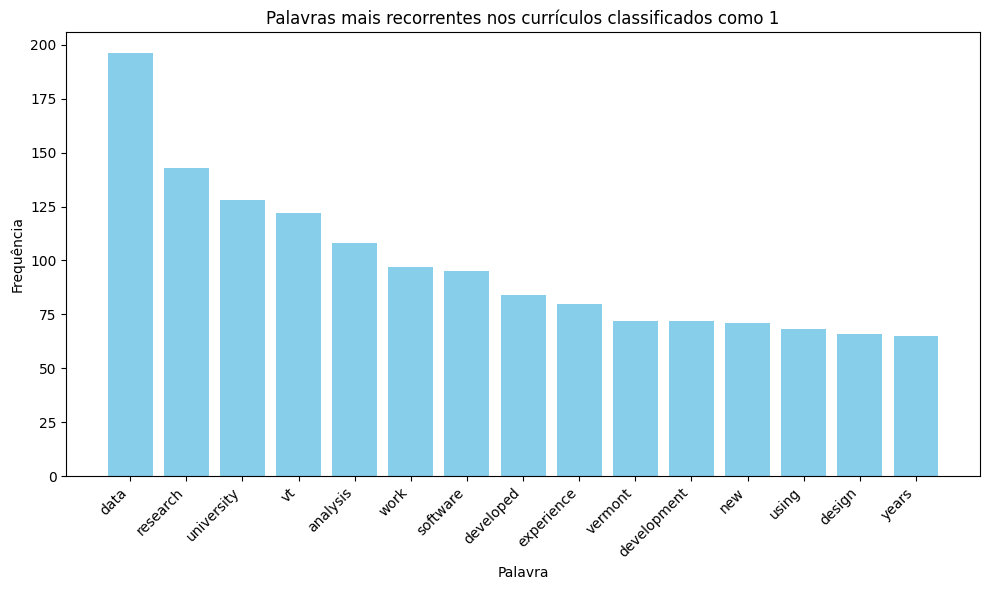

In [ ]:
# Selecionar as 15 palavras mais recorrentes
top_words = word_freq_df.head(15)

# Plotar um gráfico de barras das palavras mais recorrentes
plt.figure(figsize=(10, 6))
plt.bar(top_words.index, top_words['frequency'], color='skyblue')
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.title('Palavras mais recorrentes nos currículos classificados como 1')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
